In [1]:
## load packages and mapping algorithm
import numpy as np
import position_mapping_2D as iter_map
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload 
%autoreload 2


In [2]:
## load datasets
from scipy.io import loadmat
data_path = 'datasets/lasahandwritingdataset/DataSet/'
# name = 'Angle'
# name = 'GShape' # fail
name = 'heee'
# # name = 'NShape'
name = 'JShape'
name = 'CShape'

data  = loadmat(data_path + name + '.mat')
# 'demos',                   'dt'=0.003
#   1x6,   
#  'pos',  't',   'vel',  'acc',  'dt'
#   2x1000, 1x1000, 2x1000, 2x1000, 0.0025

In [3]:
dt = data['demos'][0,4]['dt'][0][0][0][0]
print dt
# print data['demos'][0,4]['t']

0.004010632777424773


In [4]:
demo_nums = data['demos'].shape[1] # number of demos
dim, points_nums =data['demos'][0,0]['pos'][0][0].shape[0], data['demos'][0,0]['pos'][0][0].shape[1]
xp = [data['demos'][0,i]['pos'][0][0] for i in range(demo_nums) ] # all position data
dxp = [data['demos'][0,i]['vel'][0][0] for i in range(demo_nums) ] # all vel data

In [5]:
for i in range(len(xp)):
    xp[i] = xp[i] - xp[i][:,-1,None]


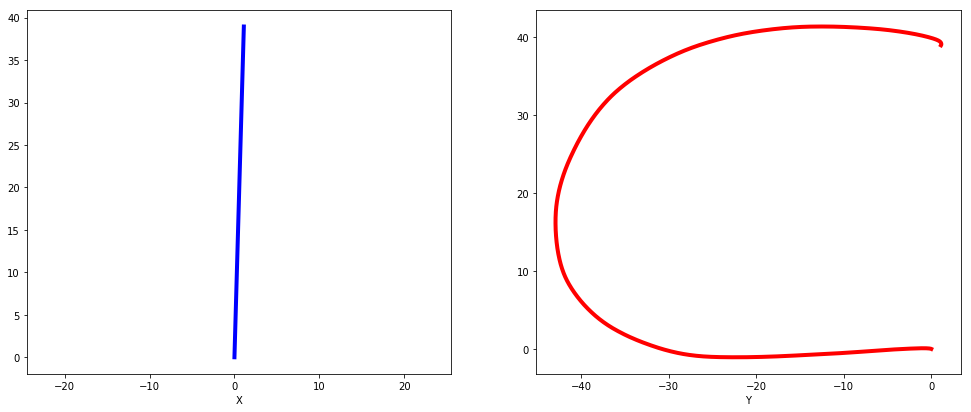

In [6]:
fig_width = 85/25.4 *5 # mm to inch
fig, ax = plt.subplots(ncols=2, figsize=(fig_width, fig_width/2 *4/5))
ax[0].axis('equal')
ax[0].set_xlabel('X')
# ax[0].scatter(xk[:,0],xk[:,1],s = 10,c=xk_color)
x_mean = np.zeros(data['demos'][0,0]['pos'].shape)

for i in range(demo_nums):
    # ax[1].plot(x[i][0,:],x[i][1,:],color='k',linewidth=1.2)
    # ax[1].plot(dx[i][0,:],dx[i][1,:],color='k',linewidth=1.2)
    x_mean = x_mean + xp[i]
x_mean = x_mean/demo_nums
ax[1].plot(x_mean[0,:], x_mean[1,:],color='r',linewidth=4)
ax[1].set_xlabel('Y')

X = np.linspace(x_mean[:,0], x_mean[:,-1],points_nums,axis=1 )
ax[0].plot(X[0,:], X[1,:],color='b',linewidth=4)
Y = np.copy(x_mean.T)
X = np.copy(X.T)
N = X.shape[0]

In [7]:
X.shape

(1000, 2)

In [8]:
## learn mapping
# build the diffeomorphism from X to Y (left to right)
para = np.array([200, 0.8, 0.8])  # iteration algorithm parameter
rho_belta, p,v = iter_map.mapping(X, Y, para)
learnt_data = [rho_belta, p, v]
k_iteration = int(para[0]) + 1
# k_iteration = int(para[0]) 

def forward(x):
    return iter_map.mapping_forward_evaluation(x,learnt_data, k_iteration)
def backward(x):
    return iter_map.mapping_back_evaluation(x,learnt_data, k_iteration)


p_end [[ 0.05071364 -0.05284032]]


In [9]:
y_pred = forward(X)
error = np.sqrt(np.sum((y_pred[:,:2]- Y[:,:2])**2,axis=1))
print 'pos error', np.mean(error), np.std(error), "[mm]"



pos error 0.07142792895103518 0.036332989640821746 [mm]


In [10]:
y_pred.shape

(1000, 2)

In [11]:
print X[-1,:]
print forward(X[-1,:])
print Y[-1,:]
print backward(Y[-1,:])

[0. 0.]
[[0. 0.]]
[0. 0.]
[1.07043450e-15 2.59897041e-15]


In [12]:
aa  = np.array([[0,1.],[1,2]])
print aa[-1,None,:]


[[1. 2.]]


In [13]:
iter_map.mapping_forward_evaluation(np.array([0,0.]).reshape(1,-1), learnt_data, k_iteration)

array([[0., 0.]])

In [14]:
# check mapping 
grid_lines=[]

offset = 15
nbGrid = 20
x_grid_ = np.linspace(np.min(Y[:,0]) - offset, np.max(Y[:,0]) + offset, nbGrid)
y_grid_ = np.linspace(np.min(Y[:,1]) - offset, np.max(Y[:,1]) + offset, nbGrid)
x_grid, y_grid = np.meshgrid(x_grid_, y_grid_)
for ii in range(nbGrid):
    for jj in range(nbGrid):               
        x_grid_point = np.array([x_grid[ii,jj],y_grid[ii,jj] ])
        grid_lines.append(x_grid_point)

grid_lines = np.asarray(grid_lines)
grid_lines2 = forward(grid_lines)



In [15]:
grid_lines2.shape


(400, 2)

error mean:  0.07142792895103518    error std: 0.036332989640821746


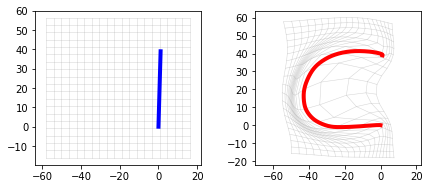

In [16]:

fig_width = 85/25.4 *8/5 # mm to inch
xk_color = np.array([[166,206,227,255],[31,120,180,255],[178,223,138,255],[51,160,44,255],[251,154,153,255]])/255.


fig, ax = plt.subplots(ncols=2, figsize=(fig_width, fig_width/2 *4/5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "8"
plt.rcParams["text.usetex"] = False
# plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['ps.fonttype'] = 42

fig.subplots_adjust(left=0, bottom=0, right=1, top=1,
                wspace=0.33, hspace=0)
color_xk = np.array([[0,1,0,1],[0.5,0.5,0,1],[0,0,1,1],[1,0,0,1],[1,0.5,0.5,1]])
# plt.axis([-3.5, 3.5, -3.5,3.5])

grids1 = grid_lines[:,:].reshape(nbGrid,nbGrid,2)
grids2 = grid_lines2[:,:].reshape(nbGrid,nbGrid,2)

set_alpha = 0.5
downsampling = 1
for i in range(0,nbGrid,downsampling):
    ax[0].plot(grids1[i,:,0], grids1[i,:,1], c = 'darkgray', alpha=set_alpha,linewidth=0.5)
    ax[0].plot(grids1[:,i,0], grids1[:,i,1], c = 'darkgray', alpha=set_alpha,linewidth=0.5)
    ax[1].plot(grids2[i,:,0], grids2[i,:,1], c = 'darkgray', alpha=set_alpha,linewidth=0.5)
    ax[1].plot(grids2[:,i,0], grids2[:,i,1], c = 'darkgray', alpha=set_alpha,linewidth=0.5)

ax[0].axis('equal')
# ax[0].scatter(X[:,0],X[:,1],s = 1,c=xk_color)
# ax[1].scatter(Y[:,0],Y[:,1],s = 1,c=xk_color)

# ax[0].set_ylabel("y", fontsize=10)
# ax[0].set_xlabel('My Label', fontsize=10)


ax[1].axis('equal')
# ax[1].axis.set_ticks(np.arange(0., 0.5, 0.2))

# ax[1].plot(y_data[:,0],y_data[:,1],'.',color='k',markersize=1.2)
# ax[1].plot(y_data[:,0],y_data[:,1],color='k',linewidth=1.2)    

# plt.show()

y_pred = forward(np.copy(X))
error = np.sqrt(np.sum((y_pred - Y)**2,axis=1))
print 'error mean: ', np.mean(error),'   error std:',np.std(error)  # 

ax[0].plot(X[:,0], X[:,1],color='b',linewidth=4)
ax[1].plot(Y[:,0], Y[:,1],color='r',linewidth=4)


paper_path = 'figures'
fig.savefig(paper_path+'/2D_mapping.pdf',format='pdf',bbox_inches='tight',  pad_inches=0.0) 


In [17]:
%timeit forward(X[0:2,:])

100 loops, best of 3: 2.33 ms per loop


In [18]:
%timeit backward(Y[0,:])

100 loops, best of 3: 16.8 ms per loop


We have two DS: $\dot x = f(x) =  -\gamma(x)(x) $ and $\dot x = g(x)$, with a diffeomorphism $\Phi$

so $g(\Phi(x)) = f(x) J_\Phi(x)$, here $J_\Phi(x)$ is the Jacobian of forward mapping.

$g(x) = f(\Phi^{-1}(x)) J_\Phi(\Phi^{-1}(x))  = -\gamma(\Phi^{-1}(x))(\Phi^{-1}(x))J_\Phi(\Phi^{-1}(x))$


In the FDM paper, they set $\gamma(x)$ as :
$$
\gamma =  \begin{cases} \frac{\left\lVert  y(0) \right\rVert}{N\Delta t \left\lVert  x \right\rVert}&,  \\
\frac{\left\lVert  y(0) \right\rVert}{N}
\end{cases}
$$

In [19]:
gamma = []
def sim_right(y, dt=dt):
    # y0: (2,)   a start point of demonstration(right) space in the above figure
    # dt,        simulation time step

    x = backward(y) # get the cooresponding point in the left space
    # simulation the trajectory in left space, with the start point x
    traj_x = sim_left(x)
    # apply forward mappint on traj_x, to get the trajectory in the right space.
    traj_y = forward(traj_x)
    return traj_y


def sim_left(x, dt=dt, eps = 0.1):
    global gamma,A 
    # x: (2,)   a start point of left space in the above figure
    # dt,        simulation time step

    # simulation the trajectory in left space, with the start point x
    y0 = np.copy(Y[0,:])
    x0 = np.copy(x)
    y0_norm = np.linalg.norm(Y[0,:])
    traj_x = [x]
    t = 0
    while np.linalg.norm(x)>eps:

        if np.linalg.norm(x)>= y0_norm / N:
            gamma_x =  y0_norm/ (N * dt * np.linalg.norm(x) )            
        else:
            gamma_x = y0_norm/ N
        gamma_x=1
        # vector
        alpha_1 = y0 / np.linalg.norm(y0)
        alpha_2 = np.array([-y0[1], y0[0]]) /np.linalg.norm(y0)
        P = np.concatenate([alpha_1.reshape(-1,1), alpha_2.reshape(-1,1)], axis=1)
        # eigenvalue
        k = 5
        lambda_1 = -1
        lambda_2 = -1 * k
        Lambda = np.array([[lambda_1,0], [0,lambda_2]])

        # Square matrix
        A = np.dot(np.dot(P, Lambda), np.linalg.inv(P) )*gamma_x
        
        dx = np.dot(A, x.reshape(-1,1))
        # update position
        x = x + dx.flatten() * dt
        traj_x.append(x)
        t = t+dt
        # print A, dx,x
        if t>20:
            print 'error',np.linalg.norm(x)
            break
    # print A, dx,x
    return np.asarray(traj_x)

In [20]:
def J_Phi(x):  
    x = x.flatten()
    x = x[:2]
    # input:   x, [2,]
    # output:  J, [2,2], Jacobian of the forward mapping
    J_Phi_all = np.array([[1,0],[0,1.]])
    rho_belta, p, v = learnt_data[0], learnt_data[1], learnt_data[2]  # position data
    for i in range(k_iteration):
        tmp =  np.exp(-rho_belta[i,0]**2 * np.sum((x - p[i,:])**2)) * (-2) * rho_belta[i,0]**2*(x-p[i,:]).reshape(1,-1)
        J_Phi_i = np.array([[1.,0],[0,1]]) + np.dot(v[i,:].reshape(-1,1), tmp)
        J_Phi_all = np.dot(J_Phi_i, J_Phi_all)
    return J_Phi_all

$\dot x = f(x)$

In [21]:
def f(x, dt=dt, eps = 0.1):
    # x :  left space position

    x = x[:2]
    y0 = np.copy(Y[0,:])
    y0_norm = np.linalg.norm(Y[0,:])
    if np.linalg.norm(x)>= y0_norm / N:
        gamma_x =  y0_norm/ (N * dt * np.linalg.norm(x) )            
    else:
        gamma_x = y0_norm/ N
     # vector
    alpha_1 = y0 / y0_norm
    alpha_2 = np.array([-y0[1], y0[0]]) /y0_norm
    P = np.concatenate([alpha_1.reshape(-1,1), alpha_2.reshape(-1,1)], axis=1)
    # eigenvalue
    k = 5
    lambda_1 = -1
    lambda_2 = -1 * k
    Lambda = np.array([[lambda_1,0], [0,lambda_2]])

    # Square matrix
    A = np.dot(np.dot(P, Lambda), np.linalg.inv(P) ) * gamma_x
    
    dx = np.dot(A, x.reshape(-1,1))
    return dx.flatten()


In [22]:
def g(x):
    # input:    x [2,] position of right space
    # output:   dx [2,] velocity
    x_left  = backward(x)
    dx_left = f(x_left)
    _,J = iter_map.mapping_forward_evaluation(x_left,learnt_data, k_iteration, Jac=True)
    dx_right = np.dot(J, dx_left.reshape(-1,1) )
    return dx_right.flatten()

def sim_right_traj(x, dt=dt, eps = 0.1):
    t =0
    traj_x = [x]
    while np.linalg.norm(x)>eps:
        dx = g(x)
        x = x + dx * dt
        t = t+dt
        if t>10:
            print 'error',np.linalg.norm(x)
            break
        traj_x.append(x)
    return np.asarray(traj_x)


In [23]:
%timeit J_Phi(np.array([10,0.]))


100 loops, best of 3: 2.67 ms per loop


In [24]:
%timeit g(np.array([50,50.]))


100 loops, best of 3: 19.4 ms per loop


In [25]:
def generate_rec(data, sample_nums = 10):
    # x_min, y_min, x_max, y_max
    x1 = [np.min(data[:,0]) - offset, np.min(data[:,1]) - offset, np.max(data[:,0]) + offset, np.max(data[:,1]) + offset]

    x11 = np.linspace(np.array([x1[0],x1[1]]), np.array([x1[2],x1[1]]), sample_nums, axis=0 )
    x21 = np.linspace(np.array([x1[2],x1[1]]), np.array([x1[2],x1[3]]), sample_nums, axis=0 )
    x31 = np.linspace(np.array([x1[2],x1[3]]), np.array([x1[0],x1[3]]), sample_nums, axis=0 )
    x41 = np.linspace(np.array([x1[0],x1[3]]), np.array([x1[0],x1[1]]), sample_nums, axis=0 )
    x_rec = np.concatenate([x11,x21,x31,x41],axis=0)  # rectangle of the space
    return x_rec

In [26]:
# select all start points for the vector field
x_grid_ = np.linspace(np.min(Y[:,0]) - offset, np.max(Y[:,0]) + offset, nbGrid)
y_grid_ = np.linspace(np.min(Y[:,1]) - offset, np.max(Y[:,1]) + offset, nbGrid)

field_nums =  10
# x_min, y_min, x_max, y_max
x1 = [np.min(Y[:,0]) - offset, np.min(Y[:,1]) - offset, np.max(Y[:,0]) + offset, np.max(Y[:,1]) + offset]

x11 = np.linspace(np.array([x1[0],x1[1]]), np.array([x1[2],x1[1]]), field_nums,axis=0 )
x21 = np.linspace(np.array([x1[2],x1[1]]), np.array([x1[2],x1[3]]), field_nums,axis=0 )
x31 = np.linspace(np.array([x1[2],x1[3]]), np.array([x1[0],x1[3]]), field_nums,axis=0 )
x41 = np.linspace(np.array([x1[0],x1[3]]), np.array([x1[0],x1[1]]), field_nums,axis=0 )
x_rec = np.concatenate([x11,x21,x31,x41],axis=0)  # rectangle of the space
# x2 = np.linspace(np.max(Y[:,0]) + offset, np.max(Y[:,1]) + offset, field_nums)
# x3 = np.linspace(np.max(Y[:,0]) + offset, np.max(Y[:,1]) + offset, field_nums)
y_rec = generate_rec(Y)
x_rec = generate_rec(X)
# traj_right=[]
# for i in range(field_nums*4):
#     traj_i = sim_right(y_rec[i,:])
#     traj_right.append(traj_i)

# traj_left=[]
# for i in range(field_nums*4):
# # for i in range(1):

#     traj_i = sim_left(y_rec[i,:])
#     traj_left.append(traj_i)


In [27]:
x_test = np.array([50,50.])
sim_left(x_test)

array([[5.00000000e+01, 5.00000000e+01],
       [4.90207704e+01, 4.98216019e+01],
       [4.80610835e+01, 4.96434754e+01],
       ...,
       [2.85608256e-03, 1.00482177e-01],
       [2.84462786e-03, 1.00079180e-01],
       [2.83321910e-03, 9.96777993e-02]])

In [28]:
print 'Goal accuracy:',np.linalg.norm(traj_right[0][-1,:])
print traj_left[0][-1,:]


Goal accuracy:

NameError: name 'traj_right' is not defined

In [ ]:
## evaluation

fig_width = 85/25.4 *5 # mm to inch
fig, ax = plt.subplots(ncols=2, figsize=(fig_width, fig_width/2 *4/5))


ax[1].plot(Y[:,0], Y[:,1],color='r',linewidth=4,zorder=10)
ax[0].axis('equal');ax[1].axis('equal')
ax[0].plot(X[:,0], X[:,1],color='b',linewidth=4,zorder=10)

# plot vector field.
for i in range(4*field_nums):
    ax[1].plot(traj_right[i][:,0], traj_right[i][:,1],color='#66ccff',linewidth=1.5)
    ax[0].plot(traj_left[i][:,0], traj_left[i][:,1],color='#66ccff',linewidth=1.5)



fig.savefig(paper_path+'/2D_DS1.pdf',format='pdf',bbox_inches='tight',  pad_inches=0.0) 
# fig.savefig(paper_path+'/2D_DS_sim_traj_right.pdf',format='pdf',bbox_inches='tight',  pad_inches=0.0) 
# fig.savefig(paper_path+'/2D_DS_no_gamma.pdf',format='pdf',bbox_inches='tight',  pad_inches=0.0) 


In [49]:
print(X.shape)
print(X[0,:])

(1000, 2)
[ 1.10746591 38.96266443]


-57.91287755592915
16.145783539758614


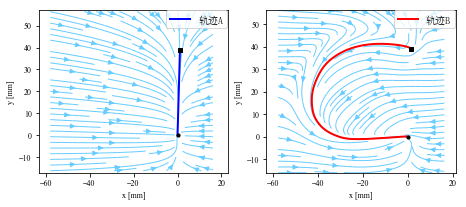

In [118]:
# https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html
# streamplot.py has been checked/ modified.
# https://github.com/matplotlib/matplotlib/issues/8388
#  https://github.com/matplotlib/matplotlib/issues/9269
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 

songti = FontProperties(fname=r"/home/xx/fonts/simsun.ttf", size=10) 
fig_width = 190/25.4  # mm to inch
fig, ax = plt.subplots(ncols=2, figsize=(fig_width, fig_width/2 *4/5))

offset = 15
nbGrid = 30
x_grid_ = np.linspace(np.min(Y[:,0]) - offset, np.max(Y[:,0]) + offset, nbGrid)
y_grid_ = np.linspace(np.min(Y[:,1]) - offset, np.max(Y[:,1]) + offset, nbGrid)
x_grid, y_grid = np.meshgrid(x_grid_, y_grid_)

U = np.zeros([nbGrid,nbGrid])
V = np.zeros([nbGrid,nbGrid])
for i in range(nbGrid):
    for j in range(nbGrid):
        grid = np.array([x_grid[i,j], y_grid[i,j]])
        vel_grid = f(grid)
        U[i,j] = vel_grid[0]
        V[i,j] = vel_grid[1]
speed = np.sqrt(U**2 + V**2)

ax[0].streamplot(x_grid, y_grid, U, V, density=[1, 1],color='#66ccff',linewidth=1)
ax[0].set_xlabel('x [mm]')
ax[0].set_ylabel('y [mm]')

for i in range(nbGrid):
    for j in range(nbGrid):
        grid = np.array([x_grid[i,j], y_grid[i,j]])
        vel_grid = g(grid)
        U[i,j] = vel_grid[0]
        V[i,j] = vel_grid[1]
ax[1].streamplot(x_grid, y_grid, U, V, density=[1, 1],color='#66ccff',linewidth=1)



ax[0].axis('equal');ax[1].axis('equal')
ax[0].plot(X[:,0], X[:,1],color='b',linewidth=2)
ax[0].scatter(X[0,0],X[0,1], s=10,c='k',zorder = 40,marker='s' )
ax[0].scatter(X[-1,0],X[-1,1], s=10,c='k',zorder = 40)
ax[0].set_xlim( -60,20 )
ax[0].set_ylim( -17,57)

print(x_grid[0,0])
print(x_grid[nbGrid-1,nbGrid-1])

ax[0].legend(labels=[u'轨迹A'],loc='upper right', bbox_to_anchor=(1.02,1.03), prop=songti)

ax[1].plot(Y[:,0], Y[:,1],color='r',linewidth=2)
ax[1].scatter(Y[0,0],Y[0,1], s=10,c='k',zorder = 40,marker='s' )
ax[1].scatter(Y[-1,0],Y[-1,1], s=10,c='k',zorder = 40)
ax[1].legend(labels=[u'轨迹B'],loc='upper right', bbox_to_anchor=(1.02,1.03), prop=songti)
ax[1].set_xlabel('x [mm]')
ax[1].set_ylabel('y [mm]')

paper_path = 'figures'

fig.savefig(paper_path+'/2D_DS_by_stream_xx.pdf',format='pdf',bbox_inches='tight',  pad_inches=0.0) 


In [99]:
print y_grid[0,0]

-16.071512230013855


In [ ]:
fig_width = 190/25.4  # mm to inch
fig, ax = plt.subplots(ncols=2, figsize=(fig_width, fig_width/2 *4/5))

# ax[0].scatter(1,1, s=30,c='k',zorder = 40,marker='o' ,label=u'圆点-查看是否为宋体')
ax[0].scatter(2,2, s=30,c='k',zorder = 40,marker='s' )
# ax[0].legend(loc=0, prop=songti)
# ax[0].legend(loc=0)

paper_path = 'figures'
fig.savefig(paper_path+'/test_font.pdf',format='pdf',bbox_inches='tight',  pad_inches=0.0)

In [ ]:
print 1

In [21]:
# sim by velocity
yt= np.copy(Y[0,:])
dis = np.linalg.norm(Y[0,:2])
t = 0
vel_sim_traj = []
while np.linalg.norm(yt[:2])>0.1:
    vel = g(yt)
    yt[:2] = vel * dt + yt[:2]
    t = t + dt
    vel_sim_traj.append([t,yt[0],yt[1]])

vel_sim_traj = np.asarray(vel_sim_traj)




In [32]:
%timeit _,J = iter_map.mapping_forward_evaluation(X[0,:],learnt_data, k_iteration, Jac=True)

100 loops, best of 3: 6.87 ms per loop


In [22]:
print 'traj time:',vel_sim_traj[-1,0], Y.shape[0]*dt

traj time: 4.038707206866729 4.010632777424773


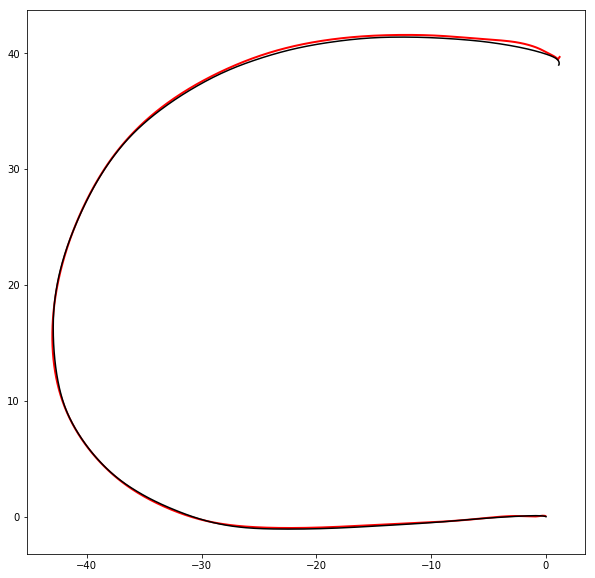

In [24]:
y0_traj = sim_right(Y[0,:])
fig = plt.figure(figsize=(10, 10))
#  Varying density along a streamline
ax = fig.add_subplot(111)
ax.plot(vel_sim_traj[:,1], vel_sim_traj[:,2],c='r',linewidth=2)

# ax.plot(y0_traj[:,0], y0_traj[:,1],c='b')
ax.plot(Y[:,0], Y[:,1],c='k')

In [ ]:
#  sim in the left space

# sim by velocity, left
x_test = x_rec[0,:]
xt= np.copy(x_test)
t = 0
vel_sim_traj = []
while np.linalg.norm(xt[:2])>0.1:
    vel = f(xt)
    xt[:2] = vel * dt + xt[:2]
    t = t + dt
    vel_sim_traj.append([t,xt[0],xt[1]])

vel_sim_traj = np.asarray(vel_sim_traj)

In [ ]:
vel_sim_traj[-1,0]

In [ ]:
x0_traj = sim_left(x_test)

fig = plt.figure(figsize=(10, 10))
#  Varying density along a streamline
ax = fig.add_subplot(111)

ax.plot(vel_sim_traj[:,1], vel_sim_traj[:,2],c='r',linewidth=2)
ax.plot(x0_traj[:,0], x0_traj[:,1])
ax.plot(X[:,0], X[:,1],'r')
ax.axis('equal')